# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# nsteps = 0
# while True:
#     nsteps += 1
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
# #     print(actions[0])
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score over {} steps (averaged over agents) this episode: {}'.format(nsteps, np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from ddpg_agent import Agent

agent = Agent(state_size, action_size, 0, num_agents)

using device: cuda:0


In [7]:
import torch
from collections import deque

def train(n_episodes=2000, max_t=1000, train=True):
    scores_deque = deque(maxlen=100)
    scores = []
    avg_scores=[]
    
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=train)[brain_name]      
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        for i in range(max_t):
                actions = agent.act(states)                        
                env_info = env.step(actions)[brain_name]           
                next_states = env_info.vector_observations         
                rewards = env_info.rewards                         
                dones = env_info.local_done                        
                agent.step(states, actions, rewards, next_states, dones)
                score += rewards                                   
                states = next_states                               
                if np.any(dones):                                  
                    break 
        scores_deque.append(np.mean(score))
        avg_score = np.mean(scores_deque)
        avg_scores.append(avg_score)
        
        print('\nEpisode {}\tAverage Score: {:.3f}'.format(i_episode,avg_score), end="")
        
        if avg_score > 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\nEnvironment solved in {:d} episodes!'.format(i_episode))
            break
    return avg_scores



In [8]:
avg_scores = train()


Episode 1	Average Score: 0.535
Episode 2	Average Score: 0.486
Episode 3	Average Score: 0.389
Episode 4	Average Score: 0.468
Episode 5	Average Score: 0.506
Episode 6	Average Score: 0.499
Episode 7	Average Score: 0.490
Episode 8	Average Score: 0.501
Episode 9	Average Score: 0.518
Episode 10	Average Score: 0.542
Episode 11	Average Score: 0.555
Episode 12	Average Score: 0.566
Episode 13	Average Score: 0.590
Episode 14	Average Score: 0.592
Episode 15	Average Score: 0.591
Episode 16	Average Score: 0.605
Episode 17	Average Score: 0.613
Episode 18	Average Score: 0.635
Episode 19	Average Score: 0.652
Episode 20	Average Score: 0.674
Episode 21	Average Score: 0.676
Episode 22	Average Score: 0.680
Episode 23	Average Score: 0.687
Episode 24	Average Score: 0.704
Episode 25	Average Score: 0.726
Episode 26	Average Score: 0.750
Episode 27	Average Score: 0.773
Episode 28	Average Score: 0.791
Episode 29	Average Score: 0.817
Episode 30	Average Score: 0.841
Episode 31	Average Score: 0.879
Episode 32	Avera

Episode 248	Average Score: 27.545
Episode 249	Average Score: 27.630
Episode 250	Average Score: 27.702
Episode 251	Average Score: 27.767
Episode 252	Average Score: 27.845
Episode 253	Average Score: 27.918
Episode 254	Average Score: 28.014
Episode 255	Average Score: 28.072
Episode 256	Average Score: 28.116
Episode 257	Average Score: 28.172
Episode 258	Average Score: 28.218
Episode 259	Average Score: 28.273
Episode 260	Average Score: 28.350
Episode 261	Average Score: 28.423
Episode 262	Average Score: 28.500
Episode 263	Average Score: 28.582
Episode 264	Average Score: 28.631
Episode 265	Average Score: 28.673
Episode 266	Average Score: 28.754
Episode 267	Average Score: 28.795
Episode 268	Average Score: 28.851
Episode 269	Average Score: 28.902
Episode 270	Average Score: 28.960
Episode 271	Average Score: 28.991
Episode 272	Average Score: 29.035
Episode 273	Average Score: 29.082
Episode 274	Average Score: 29.137
Episode 275	Average Score: 29.194
Episode 276	Average Score: 29.239
Episode 277	Av

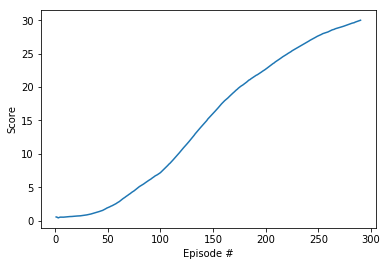

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores) + 1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig("scores.png")

### 2. Watch a smart agent!


In [ ]:
# load the weights from file

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                  # get an action (for each agent)
    env_info = env.step(actions)[brain_name] # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))